Scatter plot between first observed variable and response variable -



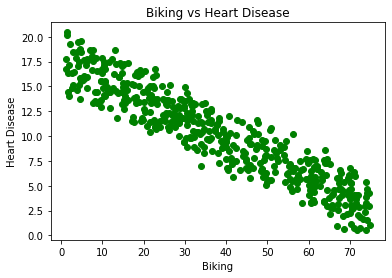


Scatter plot between second observed variable and response variable -



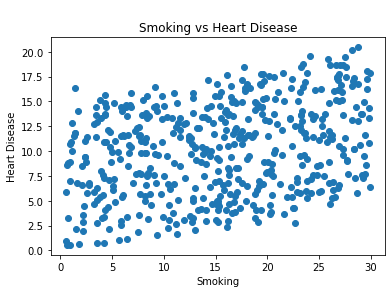

Correlation between biking and heart disease is : -0.935

Correlation between smoking and heart disease is : 0.309

Beta vector is :  [14.98465799 -0.20013305  0.17833391]

Fitted line is :
 ŷ = 14.985 + (-0.200)*biking + (0.178)*smoking

Scatter plot between observed variables and predicted value -


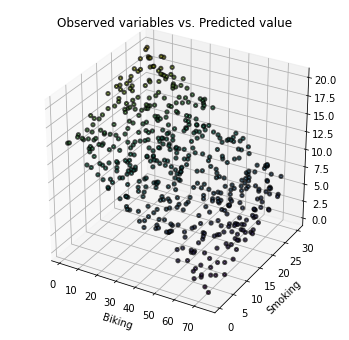

R_squared is : 0.980 

ANOVA Table -

            Sum of square  Degrees of Freedom  Mean Square  F-statistic
Regression   10176.571092                   2  5088.285546  11895.24114
Residual       211.740251                 495     0.427758          NaN
Total        10388.311344                 497    20.902035          NaN


Checking for Multicollinearity :-

If x_i and x_j regressors are correlated then |r_ij| -> unity.

The correlation matrix (X_tranpose * X) is :

 [[4.98000000e+02 1.88186287e+04 7.68664714e+03]
 [1.88186287e+04 9.40469532e+05 2.91805827e+05]
 [7.68664714e+03 2.91805827e+05 1.52799206e+05]]

By examining the correlation matrix the off diagonal elements r_ij in X_transpose * X
does not tends to unity.
Therefore problem of multicollinearity does not exist in our model.


In [2]:
# Multiple Regression

#Importing important libraries

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_csv(filename):
    x1 = []
    x2 = []
    y = []
    with open(filename) as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            x1.append(float(row[0]))
            x2.append(float(row[1]))
            y.append(float(row[2]))
        biking = np.array(x1)
        smoking = np.array(x2)
        heart_disease = np.array(y)
        return biking, smoking, heart_disease
     
if __name__ == '__main__':
    
    #Reading data from a csv file
    x1, x2, y = read_csv('data.csv')  
    
    #Scatter plot of observed and response variable
    print("Scatter plot between first observed variable and response variable -\n")
    plt.scatter(x1, y, color = 'green')
    plt.xlabel('Biking')
    plt.ylabel('Heart Disease')
    plt.title('Biking vs Heart Disease')
    plt.show()
    
    print("\nScatter plot between second observed variable and response variable -\n")
    plt.scatter(x2, y)
    plt.xlabel('Smoking')
    plt.ylabel('Heart Disease')
    plt.title('\nSmoking vs Heart Disease')
    plt.show()
    
    correlation = np.corrcoef(x1, y)
    print("Correlation between biking and heart disease is : {:.3f}".format(correlation[0][1]))

    correlation_1 = np.corrcoef(x2, y)
    print("\nCorrelation between smoking and heart disease is : {:.3f}".format(correlation_1[0][1]))
    
    x1_t = np.transpose(x1)
    x2_t = np.transpose(x2)
    x_1 = np.ones([498,])
    x_1_t = np.transpose(x_1)
    x = np.array([x_1_t, x1_t, x2_t])
    X = np.transpose(x)
    
    #Calculation of beta
    XtX = np.transpose(X) @ X
    XtX_inv = np.linalg.inv(XtX)
    XtY = np.transpose(X) @ y
    beta = XtX_inv @ XtY
    print("\nBeta vector is : ",beta)
    
    beta_0 = beta[0]
    beta_1 = beta[1]
    beta_2 = beta[2]
    
    #Fitted line
    y_pred = beta_0 + beta_1 * x1 + beta_2 * x2
    print("\nFitted line is :\n ŷ = {:.3f} + ({:.3f})*biking + ({:.3f})*smoking".format(beta_0,
                                                                            beta_1,beta_2))
    
    #Plotting the fitted line
    print("\nScatter plot between observed variables and predicted value -")
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y_pred, linewidths=2, alpha=.7, edgecolor='k', s = 10, c=y_pred)
    plt.xlabel('Biking')
    plt.ylabel('Smoking')
    plt.title('Observed variables vs. Predicted value')
    plt.show()
    
    mean_y = np.mean(y)
    
    #Calculating error term
    error = y - y_pred
    
    #Calculating sum of squares of regression i.e. SSreg
    SSreg = np.sum(y_pred ** 2) - ((np.sum(y) ** 2)/ np.size(y))
    
    #Calculating total sum of squares i.e. SSt
    SSt = np.sum((y-mean_y) ** 2)
    
    #Calculating sum of squares of residuals i.e. SSres
    SSres = SSt - SSreg
    
    #Calculating value of R-squared
    R_squared = 1 - (SSres / SSt)
    
    #Calculating degrees of freedom
    df_res = np.size(y) - ((np.size(beta)-1) + 1)
    df_reg = np.size(beta) - 1
    df_total = np.size(y) - 1
    
    #Calculating residual mean square i.e. MSres
    MSres = SSres / df_res
    
    #Calculating regression mean square i.e. MSreg
    MSreg = SSreg / df_reg
    
    #Calculating total mean square i.e. MSt
    MSt = SSt / df_total
    
    #Calculating F-statistic
    F = MSreg / MSres
    
    print("R_squared is : {:.3f} ".format(R_squared))
    print("\nANOVA Table -\n")
    
    source_of_variation = ['Regression', 'Residual', 'Total']
    data = [[ SSreg , df_reg, MSreg, F],[SSres, df_res, MSres], [SSt, df_total, MSt]]
    df = pd.DataFrame(data, columns =['Sum of square', 'Degrees of Freedom', 'Mean Square',
                                      'F-statistic'], index = source_of_variation)
    print(df)
    
    #Checking for multicollinearity
    print('\n\nChecking for Multicollinearity :-')
    print('\nIf x_i and x_j regressors are correlated then |r_ij| -> unity.')
    print("\nThe correlation matrix (X_tranpose * X) is :\n\n",XtX)
    print('''\nBy examining the correlation matrix the off diagonal elements r_ij in X_transpose * X
does not tends to unity.\nTherefore problem of multicollinearity does not exist in our model.''')
    